# Examples of 768 graphs before and after filtering

Created 240907

In [1]:
import os
import random

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns
from tqdm.autonotebook import tqdm

from sae_cooccurrence.utils.set_paths import get_git_root

/var/folders/gj/gtktc0xd6vd23yfx6f6gp_lm0000gn/T/ipykernel_90258/886115771.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
git_root = get_git_root()

# Load the data
results_path = os.path.join(
    git_root,
    "results/gpt2-small/res-jb-feature-splitting/blocks_8_hook_resid_pre_768",
)
out_path = os.path.join(git_root, "figures", "example_768_graph")
if not os.path.exists(out_path):
    os.makedirs(out_path)

In [3]:
height = 8
width = 8

In [6]:
threshold = 1.5  # Adjust this based on your specific threshold
threshold_safe = str(threshold).replace(".", "_")
jaccard_file_path = (
    f"{results_path}/feature_acts_cooc_jaccard_threshold_{threshold_safe}.npz"
)
raw_file_path = f"{results_path}/feature_acts_cooc_total_threshold_{threshold_safe}.npz"

# load the raw_file_path
with np.load(raw_file_path) as data:
    cooc_matrix = data["arr_0"]

# Load the Jaccard similarity matrix
with np.load(jaccard_file_path) as data:
    jaccard_matrix = data["arr_0"]

G_normal = nx.from_numpy_array(cooc_matrix)

# Create a graph from the Jaccard similarity matrix
G_jaccard = nx.from_numpy_array(jaccard_matrix)

G_normal.remove_edges_from(nx.selfloop_edges(G_normal))

# Remove self-loops
G_jaccard.remove_edges_from(nx.selfloop_edges(G_jaccard))

print(
    f"Graph created with {G_jaccard.number_of_nodes()} nodes and {G_jaccard.number_of_edges()} edges"
)

Graph created with 768 nodes and 294370 edges


In [7]:
feature_occurences_path = (
    f"{results_path}/feature_acts_cooc_activations_threshold_{threshold_safe}.npz"
)
feature_occurences = np.load(feature_occurences_path)["arr_0"]

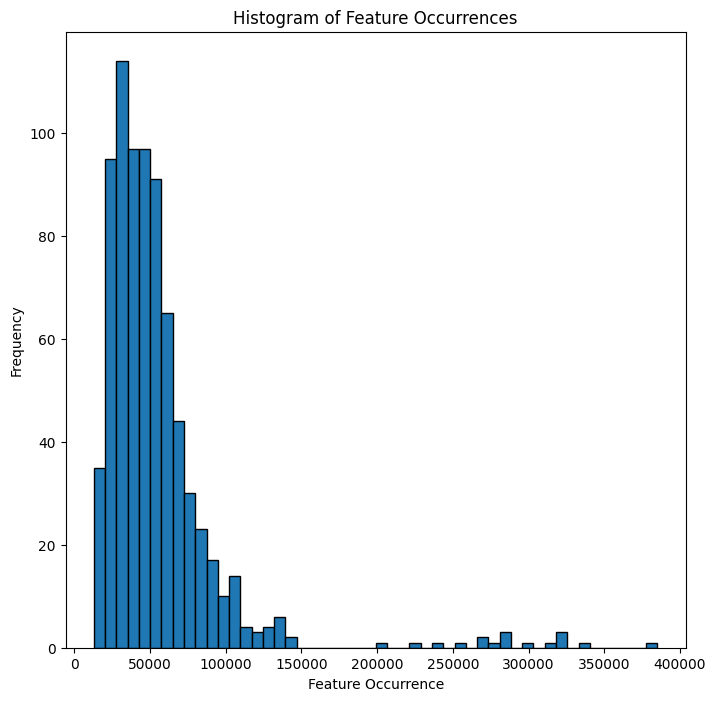

In [8]:
# plot histogram of feature occcurences
plt.figure(figsize=(width, height))
plt.hist(feature_occurences, bins=50, edgecolor="black")
plt.title("Histogram of Feature Occurrences")
plt.xlabel("Feature Occurrence")
plt.ylabel("Frequency")
plt.savefig(os.path.join(out_path, "feature_occurrence_histogram.png"), dpi=300)
# Count and analyze connected components

In [9]:
# Count and analyze connected components
connected_components = list(nx.connected_components(G_jaccard))
num_components = len(connected_components)
component_sizes = [len(c) for c in connected_components]

print(f"Number of connected components: {num_components}")
print(f"Size of the largest component: {max(component_sizes)}")
print(f"Size of the smallest component: {min(component_sizes)}")

Number of connected components: 1
Size of the largest component: 768
Size of the smallest component: 768


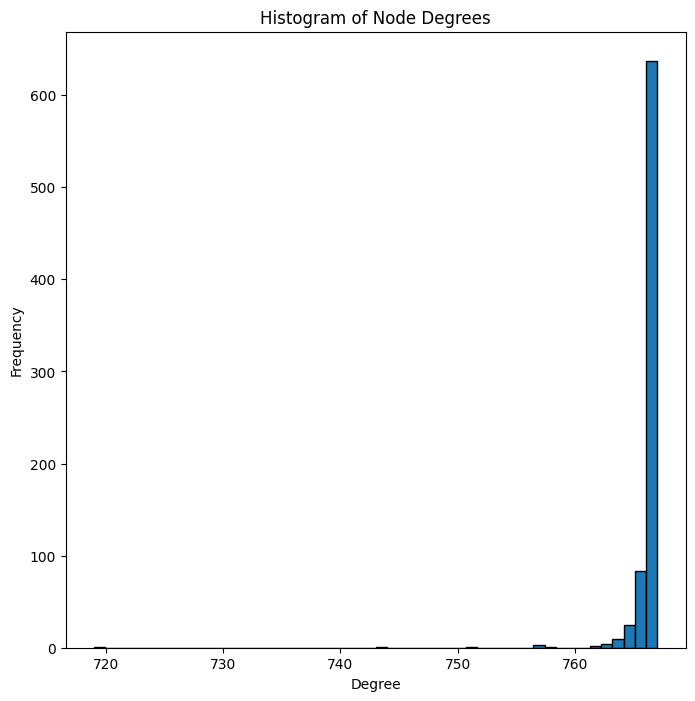

In [10]:
# Calculate node degrees
degrees = [d for n, d in G_jaccard.degree()]

# Create histogram
plt.figure(figsize=(width, height))
plt.hist(degrees, bins=50, edgecolor="black")
plt.title("Histogram of Node Degrees")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.savefig(os.path.join(out_path, "node_degree_histogram.png"), dpi=300)

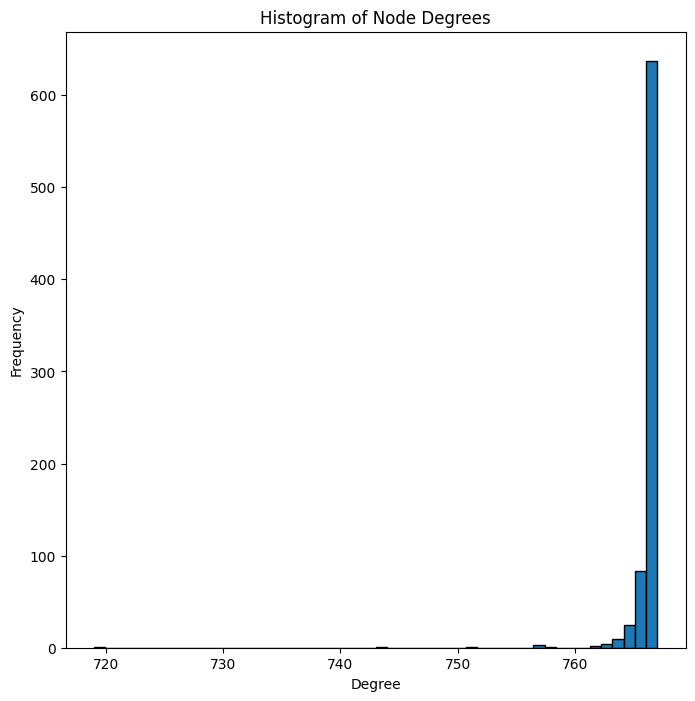

In [11]:
# Calculate node degrees
degrees = [d for n, d in G_normal.degree()]

# Create histogram
plt.figure(figsize=(width, height))
plt.hist(degrees, bins=50, edgecolor="black")
plt.title("Histogram of Node Degrees")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.savefig(os.path.join(out_path, "non_jac_node_degree_histogram.png"), dpi=300)

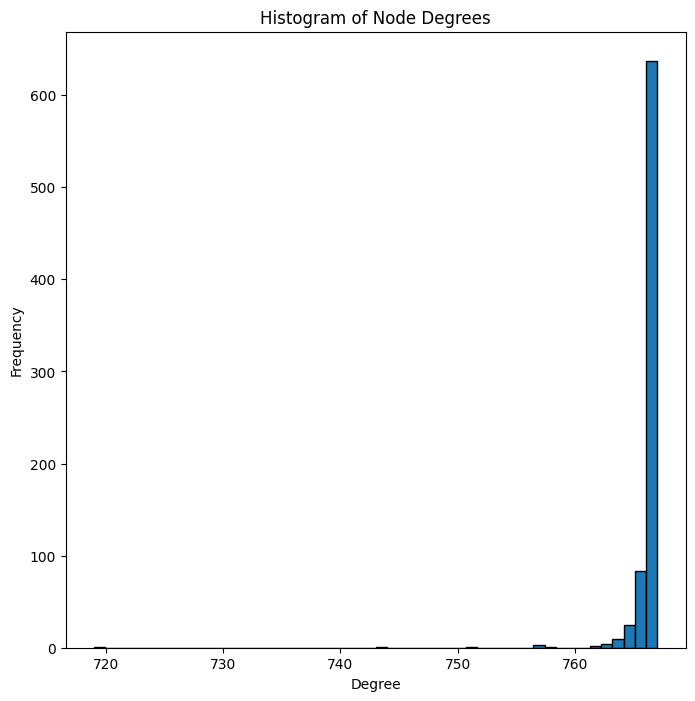

In [12]:
# Calculate node degrees
degrees = [d for n, d in G_jaccard.degree()]

# Create histogram
plt.figure(figsize=(width, height))
plt.hist(degrees, bins=50, edgecolor="black")
plt.title("Histogram of Node Degrees")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.savefig(os.path.join(out_path, "node_degree_histogram.png"), dpi=300)

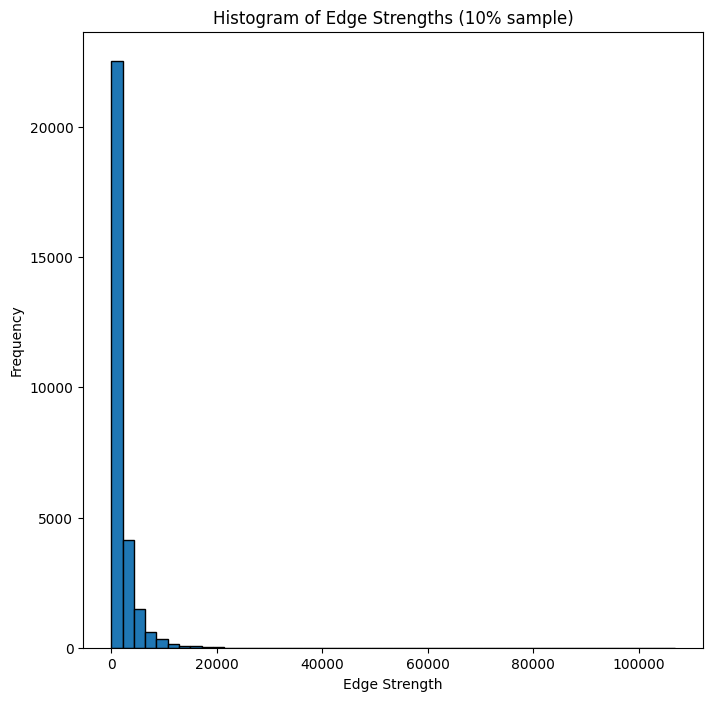

In [13]:
# Sample 10% of edges
edge_sample_normal = random.sample(
    list(G_normal.edges()), int(0.1 * G_normal.number_of_edges())
)


# Get edge weights
edge_weights_normal = [G_normal[u][v]["weight"] for u, v in edge_sample_normal]

# Create histogram
plt.figure(figsize=(width, height))
plt.hist(edge_weights_normal, bins=50, edgecolor="black")
plt.title("Histogram of Edge Strengths (10% sample)")
plt.xlabel("Edge Strength")
plt.ylabel("Frequency")
plt.savefig(os.path.join(out_path, "edge_strength_histogram.png"), dpi=300)

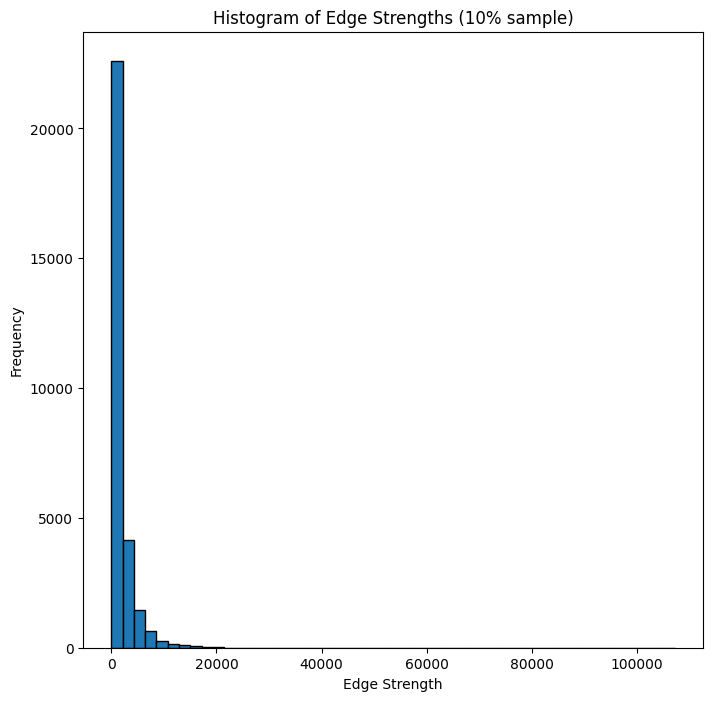

In [14]:
# Sample 10% of edges
edge_sample = random.sample(
    list(G_normal.edges()), int(0.1 * G_normal.number_of_edges())
)


# Get edge weights
edge_weights = [G_normal[u][v]["weight"] for u, v in edge_sample]

# Create histogram
plt.figure(figsize=(width, height))
plt.hist(edge_weights, bins=50, edgecolor="black")
plt.title("Histogram of Edge Strengths (10% sample)")
plt.xlabel("Edge Strength")
plt.ylabel("Frequency")
plt.savefig(os.path.join(out_path, "edge_strength_histogram.png"), dpi=300)

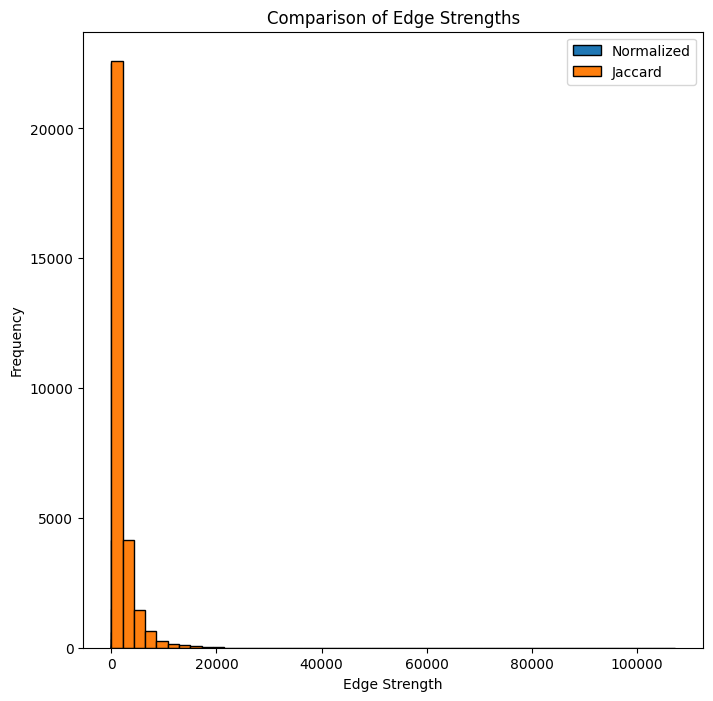

In [15]:
# Compare edge_weights and edge_weights_normal in a histogram
plt.figure(figsize=(width, height))
# Normalize edge_weights_normal by dividing by the largest edge weight
max_edge_weight_normal = max(edge_weights_normal)
normalized_edge_weights_normal = [
    weight / max_edge_weight_normal for weight in edge_weights_normal
]
plt.hist(
    normalized_edge_weights_normal,
    bins=50,
    alpha=1,
    label="Normalized",
    edgecolor="black",
)
plt.hist(edge_weights, bins=50, alpha=1, label="Jaccard", edgecolor="black")
plt.title("Comparison of Edge Strengths")
plt.xlabel("Edge Strength")
plt.ylabel("Frequency")
plt.legend()
plt.savefig(os.path.join(out_path, "edge_strength_comparison_histogram.png"), dpi=300)

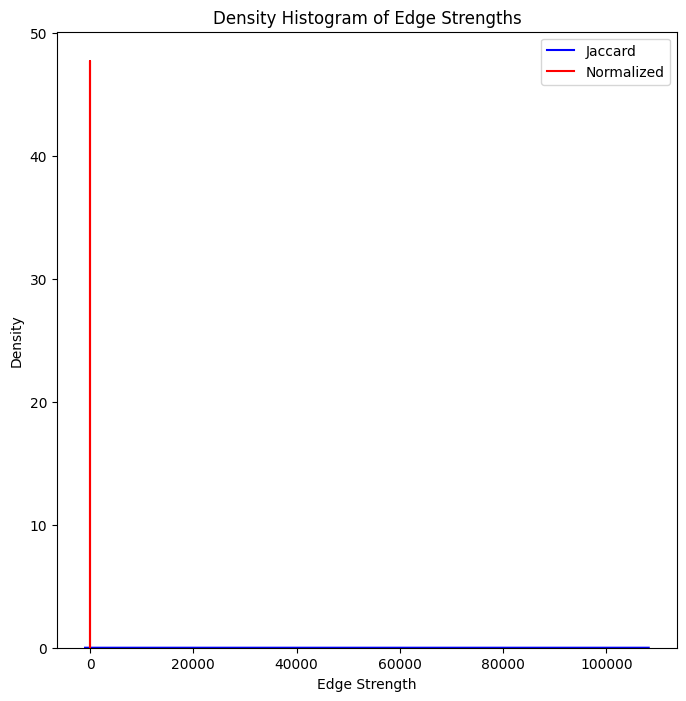

In [16]:
plt.figure(figsize=(width, height))
sns.kdeplot(edge_weights, label="Jaccard", color="blue")
# Normalize edge_weights_normal by dividing by the max edge_weight_normal
max_edge_weight_normal = max(edge_weights_normal)
normalized_edge_weights_normal = [
    weight / max_edge_weight_normal for weight in edge_weights_normal
]
sns.kdeplot(normalized_edge_weights_normal, label="Normalized", color="red")
plt.title("Density Histogram of Edge Strengths")
plt.xlabel("Edge Strength")
plt.ylabel("Density")
plt.legend()
plt.savefig(os.path.join(out_path, "edge_strength_density_histogram.png"), dpi=300)

/Users/matthew/Library/Caches/pypoetry/virtualenvs/sae-cooccurence-DZTJ6ajw-py3.11/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/matthew/Library/Caches/pypoetry/virtualenvs/sae-cooccurence-DZTJ6ajw-py3.11/lib/python3.11/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/Users/matthew/Library/Caches/pypoetry/virtualenvs/sae-cooccurence-DZTJ6ajw-py3.11/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/matthew/Library/Caches/pypoetry/virtualenvs/sae-cooccurence-DZTJ6ajw-py3.11/lib/python3.11/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmet

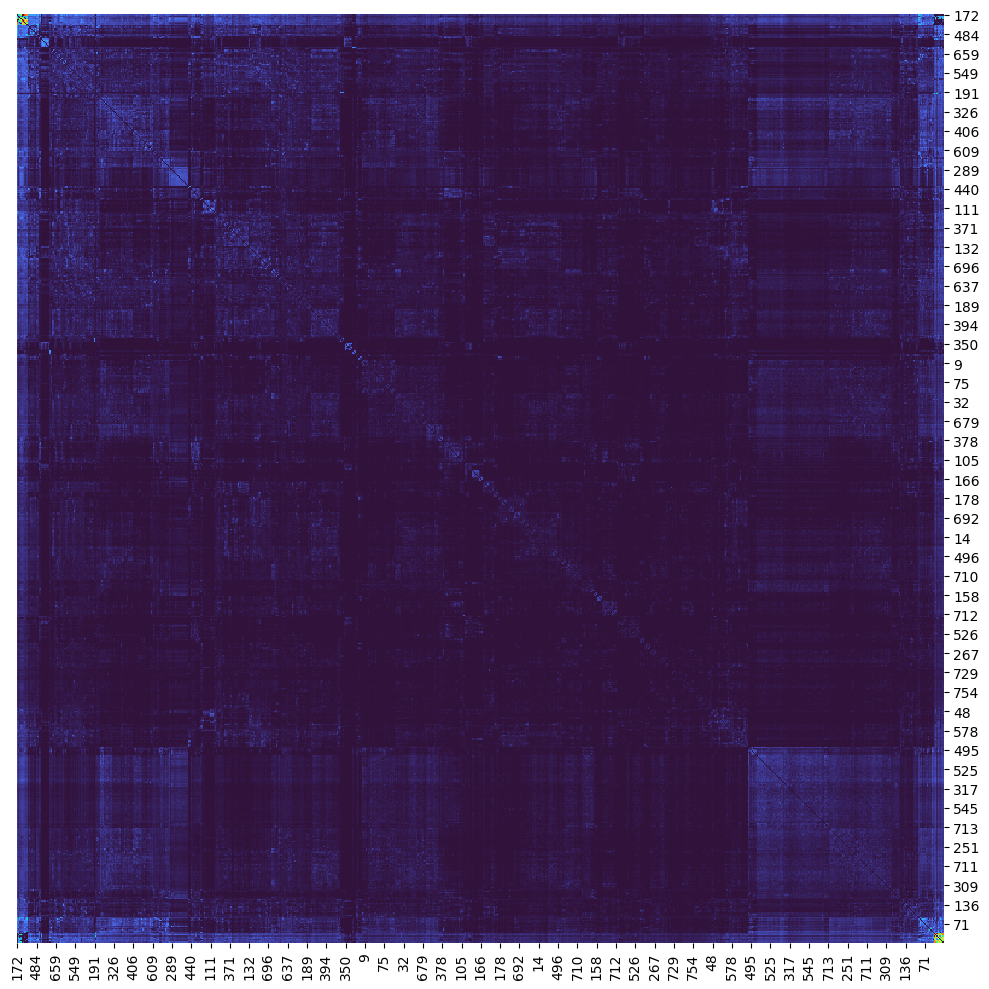

<Figure size 800x800 with 0 Axes>

In [18]:
heatmap_prep = nx.to_numpy_array(G_normal)
sns.clustermap(heatmap_prep, cmap="turbo", dendrogram_ratio=(0, 0), cbar_pos=None)
plt.figure(figsize=(width, height))
plt.savefig(os.path.join(out_path, "normal_heatmap.png"), dpi=300)

/Users/matthew/Library/Caches/pypoetry/virtualenvs/sae-cooccurence-DZTJ6ajw-py3.11/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/matthew/Library/Caches/pypoetry/virtualenvs/sae-cooccurence-DZTJ6ajw-py3.11/lib/python3.11/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/Users/matthew/Library/Caches/pypoetry/virtualenvs/sae-cooccurence-DZTJ6ajw-py3.11/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/matthew/Library/Caches/pypoetry/virtualenvs/sae-cooccurence-DZTJ6ajw-py3.11/lib/python3.11/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmet

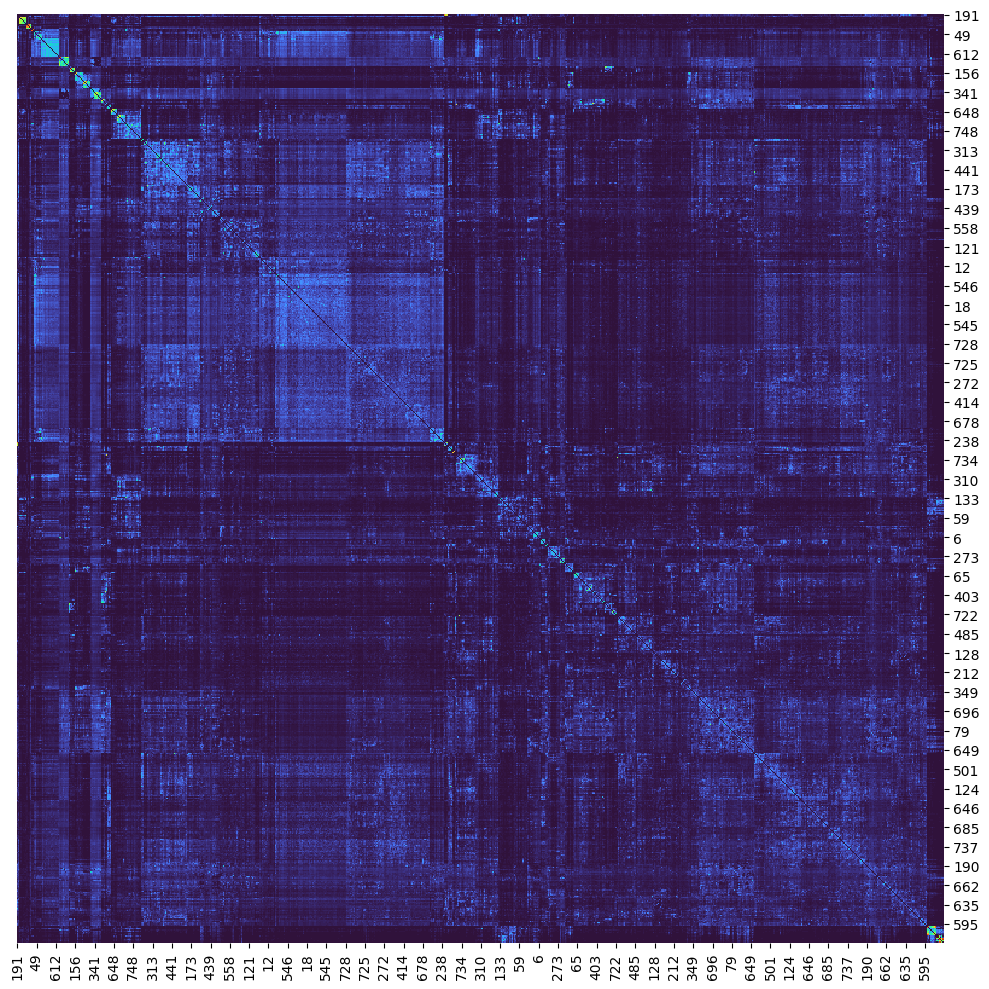

<Figure size 800x800 with 0 Axes>

In [17]:
heatmap_prep = nx.to_numpy_array(G_jaccard)
sns.clustermap(heatmap_prep, cmap="turbo", dendrogram_ratio=(0, 0), cbar_pos=None)
plt.figure(figsize=(width, height))
plt.savefig(os.path.join(out_path, "jaccard_heatmap.png"), dpi=300)

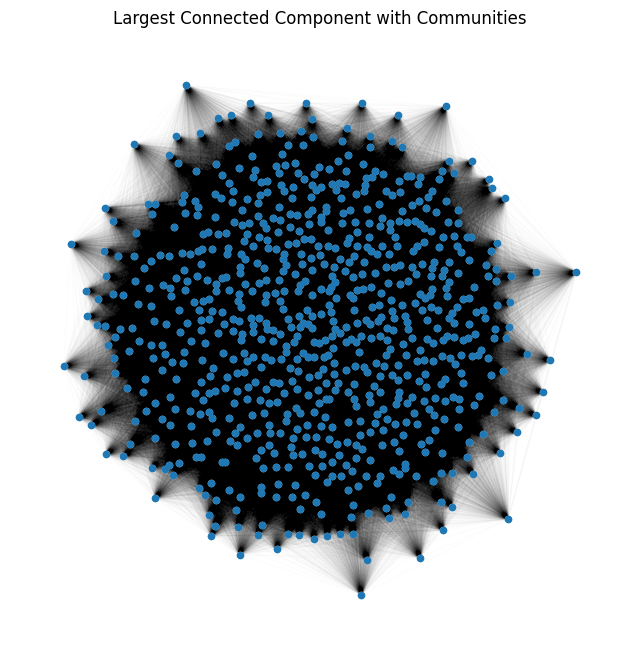

In [ ]:
# Get the largest connected component
largest_cc = max(nx.connected_components(G_jaccard), key=len)
subgraph = G_jaccard.subgraph(largest_cc)

# Use a community detection algorithm
communities = nx.community.greedy_modularity_communities(subgraph)  # type: ignore

# Create a position layout
pos = nx.spring_layout(subgraph, k=0.5)

# Visualize the network
plt.figure(figsize=(width, height))
nx.draw_networkx_nodes(subgraph, pos, node_size=20, node_color="lightblue")
nx.draw_networkx_edges(subgraph, pos, alpha=0.01)

# Color nodes based on communities
for i, community in enumerate(communities):
    nx.draw_networkx_nodes(
        subgraph, pos, nodelist=list(community), node_color=f"C{i}", node_size=20
    )

plt.title("Largest Connected Component with Communities")
plt.axis("off")
plt.savefig(
    os.path.join(out_path, "largest_component_visualization.png"),
    dpi=300,
    bbox_inches="tight",
)

In [ ]:
# import networkx as nx
# from tqdm import tqdm
# import matplotlib.pyplot as plt

# def binary_search_edge_cutoff(G, target_size, tolerance=5, max_iterations=50):
#     low, high = 0, 1
#     best_cutoff = None
#     best_size_diff = float('inf')

#     cutoffs = []
#     n_components = []
#     largest_cc_sizes = []

#     for _ in tqdm(range(max_iterations), desc="Binary Search"):
#         mid = (low + high) / 2
#         H = G.copy()
#         edges_to_remove = [(u, v) for (u, v, d) in H.edges(data=True) if d['weight'] < mid]
#         H.remove_edges_from(edges_to_remove)

#         components = list(nx.connected_components(H))
#         largest_cc = max(components, key=len)
#         largest_cc_size = len(largest_cc)

#         cutoffs.append(mid)
#         n_components.append(len(components))
#         largest_cc_sizes.append(largest_cc_size)

#         size_diff = abs(largest_cc_size - target_size)

#         if size_diff < best_size_diff:
#             best_cutoff = mid
#             best_size_diff = size_diff

#         if size_diff <= tolerance:
#             break
#         elif largest_cc_size > target_size:
#             low = mid
#         else:
#             high = mid

#     # Plot the results
#     fig, ax1 = plt.subplots(figsize=(10, 6))

#     ax1.set_xlabel('Edge Weight Cutoff')
#     ax1.set_ylabel('Number of Connected Components', color='tab:blue')
#     ax1.plot(cutoffs, n_components, color='tab:blue')
#     ax1.tick_params(axis='y', labelcolor='tab:blue')

#     ax2 = ax1.twinx()
#     ax2.set_ylabel('Largest Component Size', color='tab:orange')
#     ax2.plot(cutoffs, largest_cc_sizes, color='tab:orange')
#     ax2.tick_params(axis='y', labelcolor='tab:orange')

#     plt.title('Connected Components and Largest Component Size vs. Edge Weight Cutoff')
#     plt.tight_layout()
#     plt.show()

#     return best_cutoff, cutoffs, n_components, largest_cc_sizes

# # Usage
# target_size = 1000
# cutoff, cutoffs, n_components, largest_cc_sizes = binary_search_edge_cutoff(G, target_size)
# print(f"Edge weight cutoff: {cutoff}")

# # Create the thresholded graph
# H = G.copy()
# edges_to_remove = [(u, v) for (u, v, d) in H.edges(data=True) if d['weight'] < cutoff]
# H.remove_edges_from(edges_to_remove)

# # Remove subgraphs of size 1
# H.remove_nodes_from(list(nx.isolates(H)))

# print(f"Thresholded graph created with {H.number_of_nodes()} nodes and {H.number_of_edges()} edges")

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np


def analyze_graph_components(G, min_cutoff=0, max_cutoff=0.2, num_steps=100):
    cutoffs = np.linspace(min_cutoff, max_cutoff, num_steps)
    largest_cc_sizes = []
    median_cc_sizes = []
    mean_cc_sizes = []
    n_components = []

    for cutoff in tqdm(cutoffs, desc="Analyzing Graph"):
        H = G.copy()
        edges_to_remove = [
            (u, v) for (u, v, d) in H.edges(data=True) if d["weight"] < cutoff
        ]
        H.remove_edges_from(edges_to_remove)

        components = list(nx.connected_components(H))
        component_sizes = [len(c) for c in components]

        largest_cc_sizes.append(max(component_sizes) if component_sizes else 0)
        median_cc_sizes.append(np.median(component_sizes) if component_sizes else 0)
        mean_cc_sizes.append(np.mean(component_sizes) if component_sizes else 0)
        n_components.append(len(components))

    # Plot the results
    fig, ax = plt.subplots(figsize=(12, 8))

    ax.plot(cutoffs, largest_cc_sizes, color="tab:blue", label="Largest Component Size")
    # ax.plot(cutoffs, median_cc_sizes, color='tab:orange', label='Median Component Size')
    ax.plot(cutoffs, mean_cc_sizes, color="tab:red", label="Mean Component Size")
    ax.plot(
        cutoffs, n_components, color="tab:green", label="Number of Connected Components"
    )

    ax.set_xlabel("Edge Weight Cutoff")
    ax.set_ylabel("Value")
    ax.set_title("Graph Component Analysis")
    ax.legend()

    plt.tight_layout()
    plt.show()
    plt.savefig(os.path.join(out_path, "sensitivity.png"), dpi=300)

    return cutoffs, largest_cc_sizes, median_cc_sizes, mean_cc_sizes, n_components


# Usage
cutoffs, largest_cc_sizes, median_cc_sizes, mean_cc_sizes, n_components = (
    analyze_graph_components(G_jaccard, min_cutoff=0, max_cutoff=0.2)
)

print(
    "Analysis complete. Use the generated plot to observe the sensitivity of graph components to edge weight cutoffs."
)

In [ ]:
# Usage
max_cutoff_normal = max(G_normal.edges(data=True), key=lambda x: x[2]["weight"])
max_cutoff_normal = max_cutoff_normal[2]["weight"]
max_cutoff_normal

151435.0

Analyzing Graph: 100%|██████████| 100/100 [00:29<00:00,  3.44it/s]


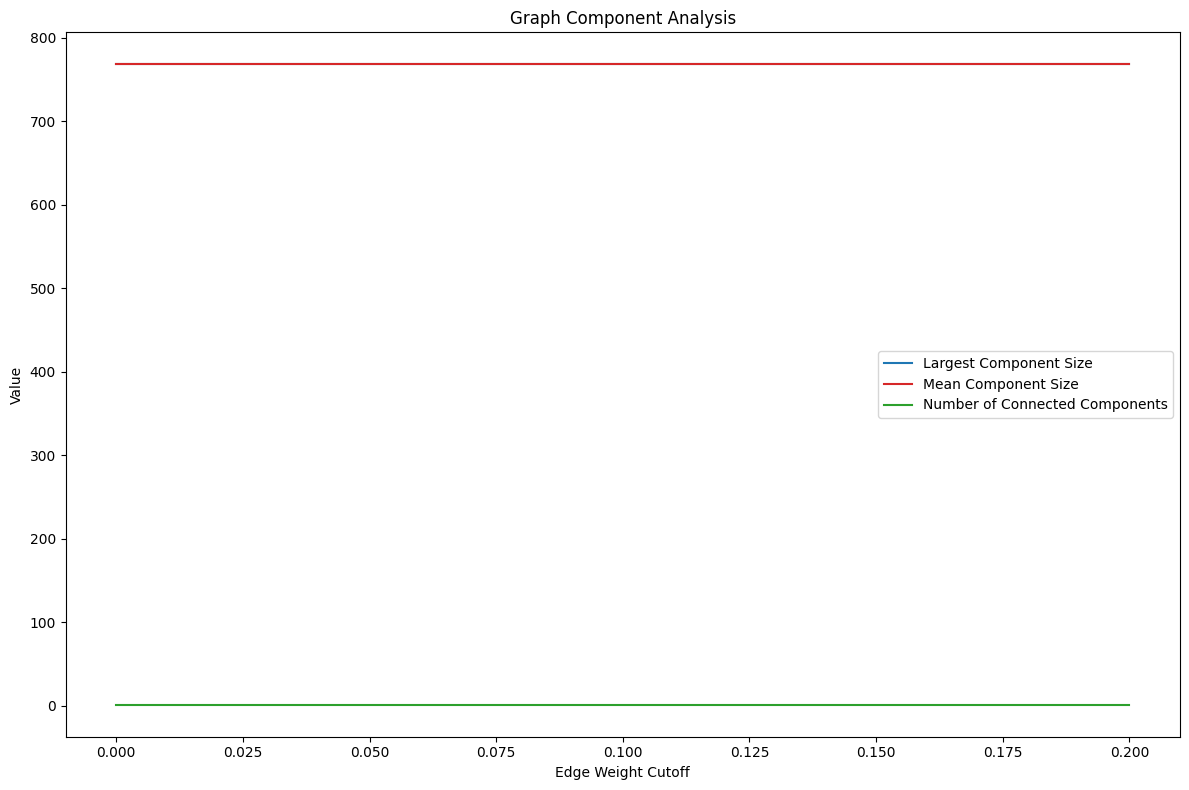

Analysis complete. Use the generated plot to observe the sensitivity of graph components to edge weight cutoffs.


<Figure size 640x480 with 0 Axes>

In [ ]:
cutoffs, largest_cc_sizes, median_cc_sizes, mean_cc_sizes, n_components = (
    analyze_graph_components(G_normal, min_cutoff=0, max_cutoff=max_cutoff_normal)
)

print(
    "Analysis complete. Use the generated plot to observe the sensitivity of graph components to edge weight cutoffs."
)

Analyzing Graph: 100%|██████████| 100/100 [00:34<00:00,  2.86it/s]


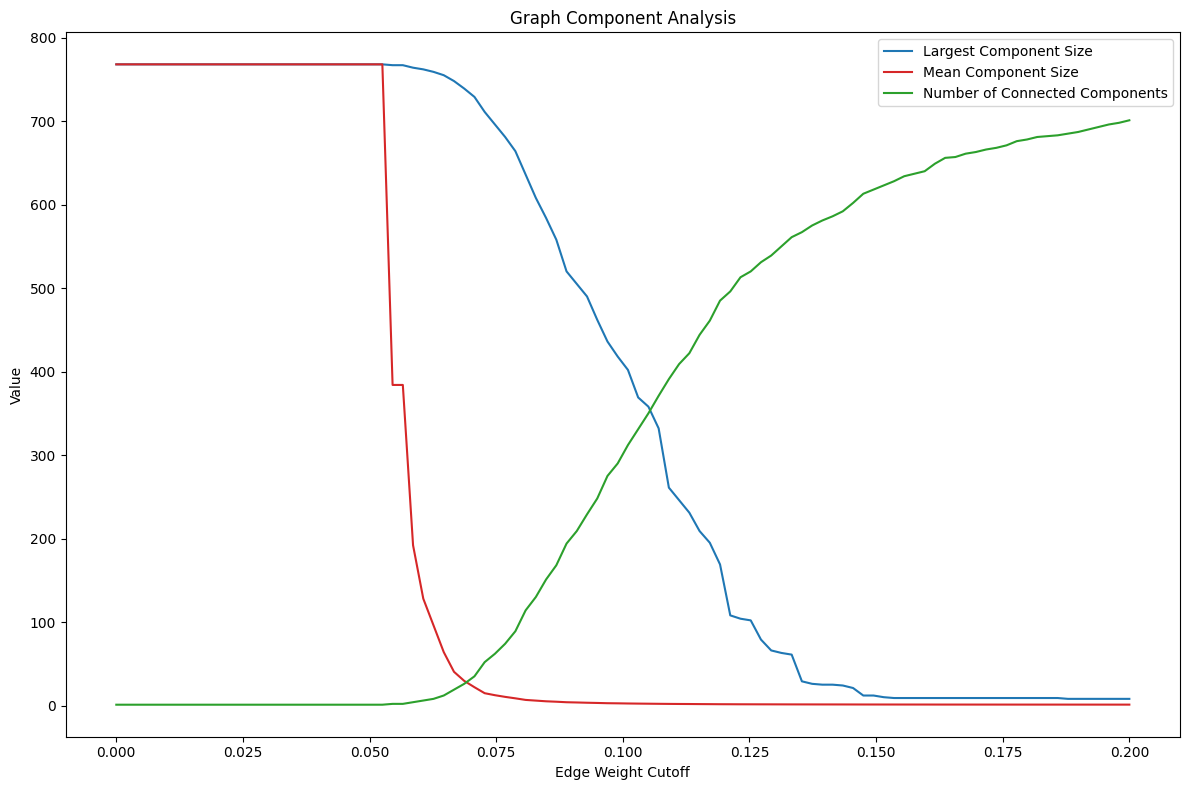

Analysis complete. Use the generated plot to observe the sensitivity of graph components to edge weight cutoffs.


<Figure size 640x480 with 0 Axes>

In [ ]:
# Usage
cutoffs, largest_cc_sizes, median_cc_sizes, mean_cc_sizes, n_components = (
    analyze_graph_components(G_jaccard, min_cutoff=0, max_cutoff=0.2)
)

print(
    "Analysis complete. Use the generated plot to observe the sensitivity of graph components to edge weight cutoffs."
)

In [ ]:
import networkx as nx


def binary_search_edge_cutoff(G, target_size, tolerance=5, max_iterations=50):
    low, high = 0, 1
    best_cutoff = None
    best_size_diff = float("inf")

    for _ in tqdm(range(max_iterations), desc="Binary Search"):
        mid = (low + high) / 2
        H = G.copy()
        edges_to_remove = [
            (u, v) for (u, v, d) in H.edges(data=True) if d["weight"] < mid
        ]
        H.remove_edges_from(edges_to_remove)

        largest_cc = max(nx.connected_components(H), key=len)
        largest_cc_size = len(largest_cc)

        size_diff = abs(largest_cc_size - target_size)

        if size_diff < best_size_diff:
            best_cutoff = mid
            best_size_diff = size_diff

        if size_diff <= tolerance:
            return mid
        elif largest_cc_size > target_size:
            low = mid
        else:
            high = mid

    return best_cutoff


# Find the edge weight cutoff
target_size = 200
cutoff = binary_search_edge_cutoff(G_jaccard, target_size)
print(f"Edge weight cutoff: {cutoff}")

# Create the thresholded graph
H = G_jaccard.copy()
edges_to_remove = [(u, v) for (u, v, d) in H.edges(data=True) if d["weight"] < cutoff]
H.remove_edges_from(edges_to_remove)

# Remove subgraphs of size 1
H.remove_nodes_from(list(nx.isolates(H)))

print(
    f"Thresholded graph created with {H.number_of_nodes()} nodes and {H.number_of_edges()} edges"
)

Binary Search:  12%|█▏        | 6/50 [00:02<00:18,  2.40it/s]


Edge weight cutoff: 0.1171875
Thresholded graph created with 350 nodes and 508 edges


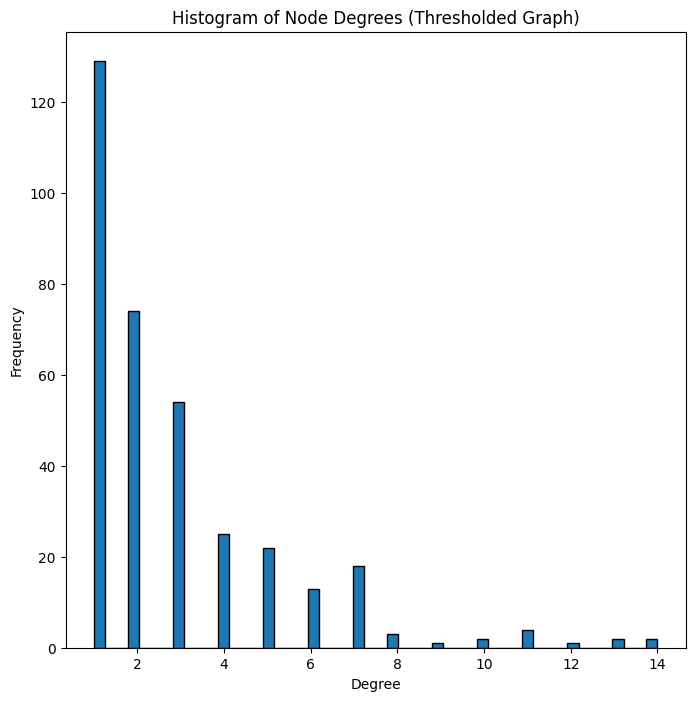

In [ ]:
import matplotlib.pyplot as plt

# Node degree histogram
degrees_thresholded = [d for n, d in H.degree()]
plt.figure(figsize=(width, height))
plt.hist(degrees_thresholded, bins=50, edgecolor="black")
plt.title("Histogram of Node Degrees (Thresholded Graph)")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.savefig(os.path.join(out_path, "thresholded_node_degree_histogram.png"), dpi=300)

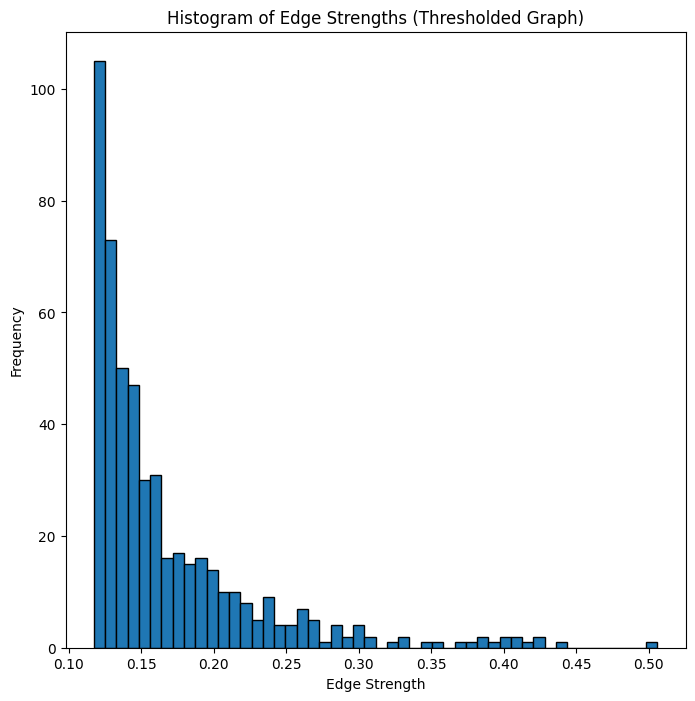

In [ ]:
# Edge strength histogram
edge_weights_thresholded = [d["weight"] for (u, v, d) in H.edges(data=True)]
plt.figure(figsize=(width, height))
plt.hist(edge_weights_thresholded, bins=50, edgecolor="black")
plt.title("Histogram of Edge Strengths (Thresholded Graph)")
plt.xlabel("Edge Strength")
plt.ylabel("Frequency")
plt.savefig(os.path.join(out_path, "thresholded_edge_strength_histogram.png"), dpi=300)

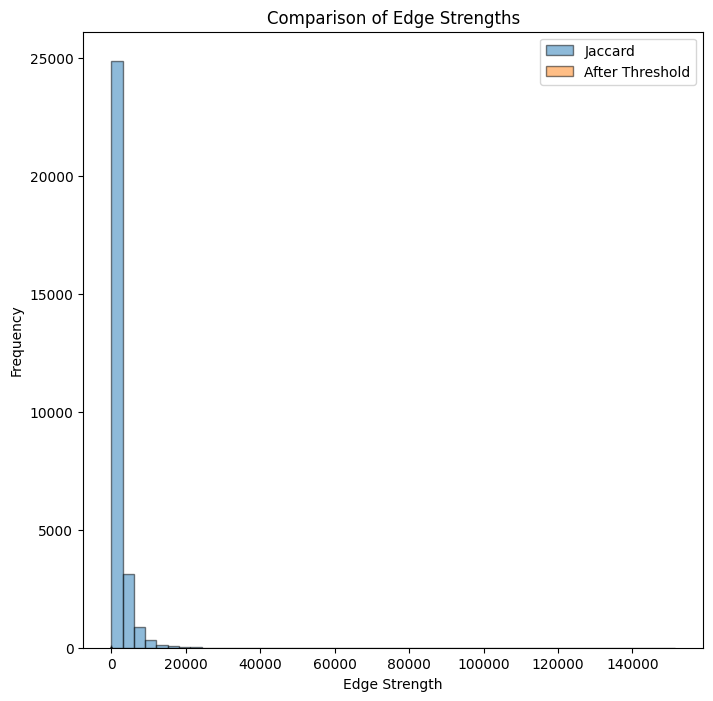

In [ ]:
# plot a histogram comparing edge_weights_normal and edge_weights_thresholded
# Compare edge_weights and edge_weights_normal in a histogram
plt.figure(figsize=(width, height))


plt.hist(edge_weights, bins=50, alpha=0.5, label="Jaccard", edgecolor="black")
plt.hist(
    edge_weights_thresholded,
    bins=50,
    alpha=0.5,
    label="After Threshold",
    edgecolor="black",
)
plt.title("Comparison of Edge Strengths")
plt.xlabel("Edge Strength")
plt.ylabel("Frequency")
plt.legend()
plt.savefig(
    os.path.join(out_path, "edge_strength_comparison_histogram_threshold.png"), dpi=300
)

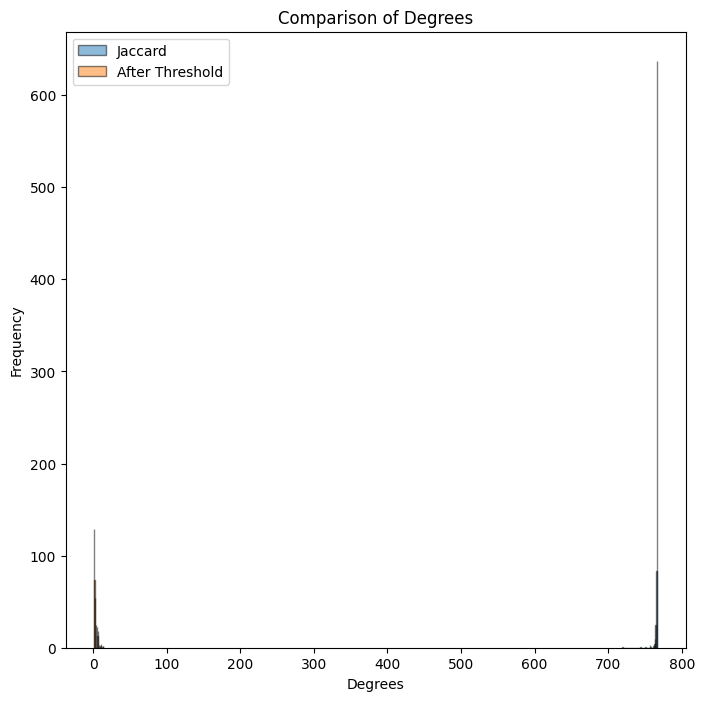

In [ ]:
# plot a histogram comparing degree for G_Jaccard and H

# plot a histogram comparing edge_weights_normal and edge_weights_thresholded
# Compare edge_weights and edge_weights_normal in a histogram
plt.figure(figsize=(width, height))


plt.hist(degrees, bins=50, alpha=0.5, label="Jaccard", edgecolor="black")
plt.hist(
    degrees_thresholded, bins=50, alpha=0.5, label="After Threshold", edgecolor="black"
)
plt.title("Comparison of Degrees")
plt.xlabel("Degrees")
plt.ylabel("Frequency")
plt.legend()
plt.savefig(
    os.path.join(out_path, "degree_strength_comparison_histogram_threshold.png"),
    dpi=300,
)

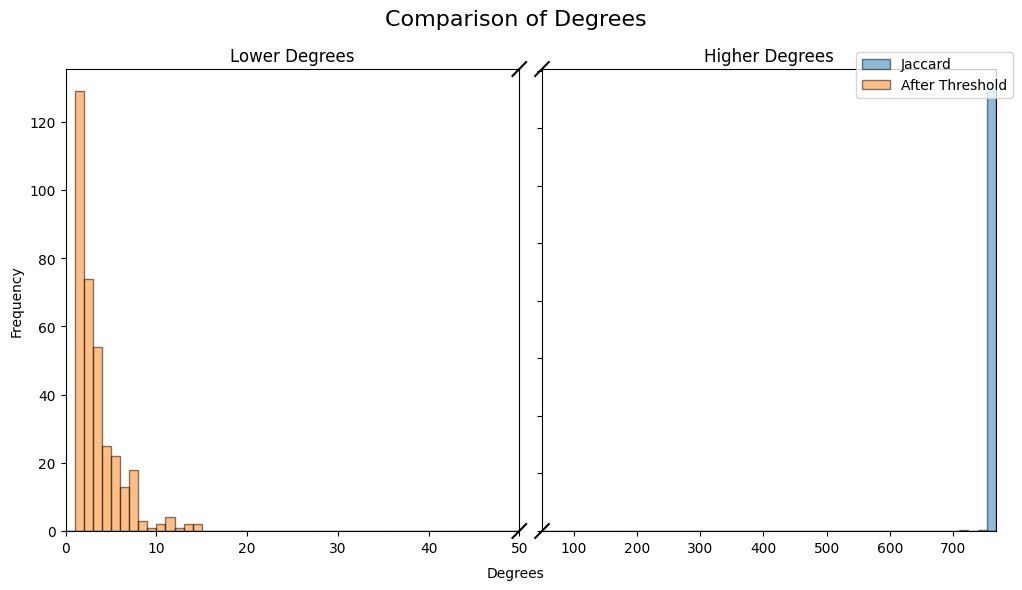

In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec


def plot_broken_axis_histogram(degrees, degrees_thresholded, out_path):
    fig = plt.figure(figsize=(12, 6))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], wspace=0.05)

    # Determine the range for each subplot
    max_degree = max(np.max(degrees), np.max(degrees_thresholded))
    cutoff = min(50, max_degree // 2)

    # Left subplot (lower degrees)
    ax1 = fig.add_subplot(gs[0])
    ax1.hist(
        degrees,
        bins=50,
        range=(0, cutoff),
        alpha=0.5,
        label="Jaccard",
        edgecolor="black",
    )
    ax1.hist(
        degrees_thresholded,
        bins=50,
        range=(0, cutoff),
        alpha=0.5,
        label="After Threshold",
        edgecolor="black",
    )
    ax1.set_xlim(0, cutoff)
    ax1.set_ylabel("Frequency")
    ax1.set_title("Lower Degrees")

    # Right subplot (higher degrees)
    ax2 = fig.add_subplot(gs[1])
    if max_degree > cutoff:
        ax2.hist(
            degrees,
            bins=50,
            range=(cutoff, max_degree),
            alpha=0.5,
            label="Jaccard",
            edgecolor="black",
        )
        ax2.hist(
            degrees_thresholded,
            bins=50,
            range=(cutoff, max_degree),
            alpha=0.5,
            label="After Threshold",
            edgecolor="black",
        )
        ax2.set_xlim(cutoff, max_degree)
        ax2.set_title("Higher Degrees")

        # Remove y-axis labels from the right subplot
        ax2.set_yticklabels([])

        # Add broken axis lines
        d = 0.015  # size of diagonal lines
        kwargs = dict(transform=ax1.transAxes, color="k", clip_on=False)
        ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
        ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

        kwargs.update(transform=ax2.transAxes)
        ax2.plot((-d, +d), (-d, +d), **kwargs)
        ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
    else:
        ax2.axis("off")  # Turn off the right subplot if there are no higher degrees

    # Add labels and title
    fig.text(0.5, 0.04, "Degrees", ha="center", va="center")
    fig.suptitle("Comparison of Degrees", fontsize=16)

    # Add a single legend for both subplots
    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper right", bbox_to_anchor=(0.92, 0.92))

    # Save the figure
    plt.savefig(
        os.path.join(out_path, "degree_strength_comparison_histogram_threshold.png"),
        dpi=300,
        bbox_inches="tight",
    )
    plt.show()


# Usage:
# plot_broken_axis_histogram(degrees, degrees_thresholded, out_path)
plot_broken_axis_histogram(degrees, degrees_thresholded, out_path)

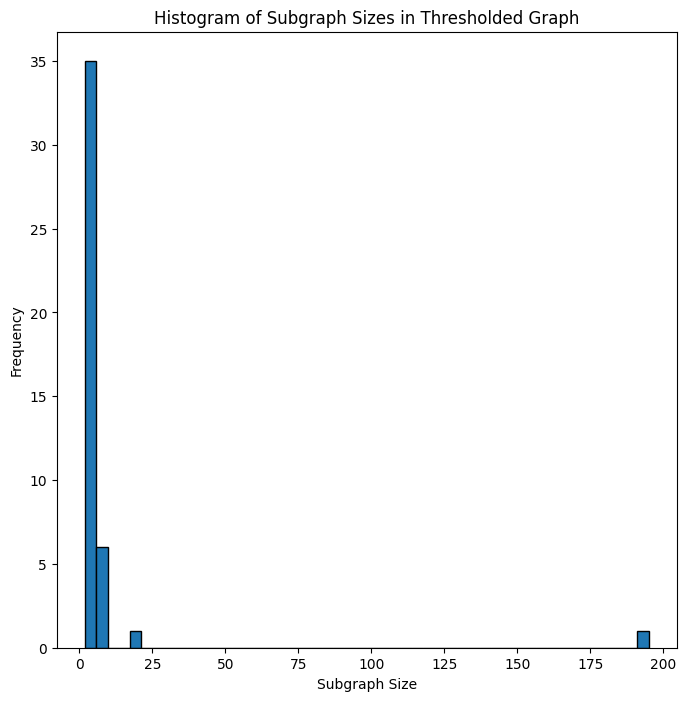

In [ ]:
# Plot the number of subgraphs in H
subgraph_sizes = [len(c) for c in nx.connected_components(H)]
plt.figure(figsize=(width, height))
plt.hist(subgraph_sizes, bins=50, edgecolor="black")
plt.title("Histogram of Subgraph Sizes in Thresholded Graph")
plt.xlabel("Subgraph Size")
plt.ylabel("Frequency")
plt.savefig(os.path.join(out_path, "thresholded_subgraph_sizes_histogram.png"), dpi=300)

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np


def visualize_graph(G, title, filename):
    plt.figure(figsize=(width, height))

    # Use a community detection algorithm
    communities = list(nx.community.greedy_modularity_communities(G))

    # Create a position layout
    pos = nx.spring_layout(G)

    # Use a fixed set of colors
    color_list = [
        "#1f77b4",
        "#ff7f0e",
        "#2ca02c",
        "#d62728",
        "#9467bd",
        "#8c564b",
        "#e377c2",
        "#7f7f7f",
        "#bcbd22",
        "#17becf",
    ]

    # Draw nodes
    for idx, community in enumerate(communities):
        nx.draw_networkx_nodes(
            G,
            pos,
            nodelist=list(community),
            node_color=color_list[idx % len(color_list)],
            node_size=20,
        )

    # Draw edges with varying thickness based on weight
    edge_weights = [G[u][v]["weight"] for u, v in G.edges()]
    nx.draw_networkx_edges(G, pos, alpha=0.1, width=edge_weights)

    plt.title(title)
    plt.axis("off")
    plt.tight_layout()
    plt.savefig(os.path.join(out_path, filename), dpi=300, bbox_inches="tight")
    plt.close()

In [ ]:
# Visualize all connected components with more than one node
connected_components = [c for c in nx.connected_components(H) if len(c) > 1]
for i, component in enumerate(connected_components):
    subgraph = H.subgraph(component)
    visualize_graph(
        subgraph,
        f"Connected Component {i+1} (Size: {len(component)})",
        f"thresholded_component_{i+1}.png",
    )

print(f"Number of connected components (excluding size 1): {len(connected_components)}")

Number of connected components (excluding size 1): 43


Visualization of all components saved as 'all_thresholded_components.png'


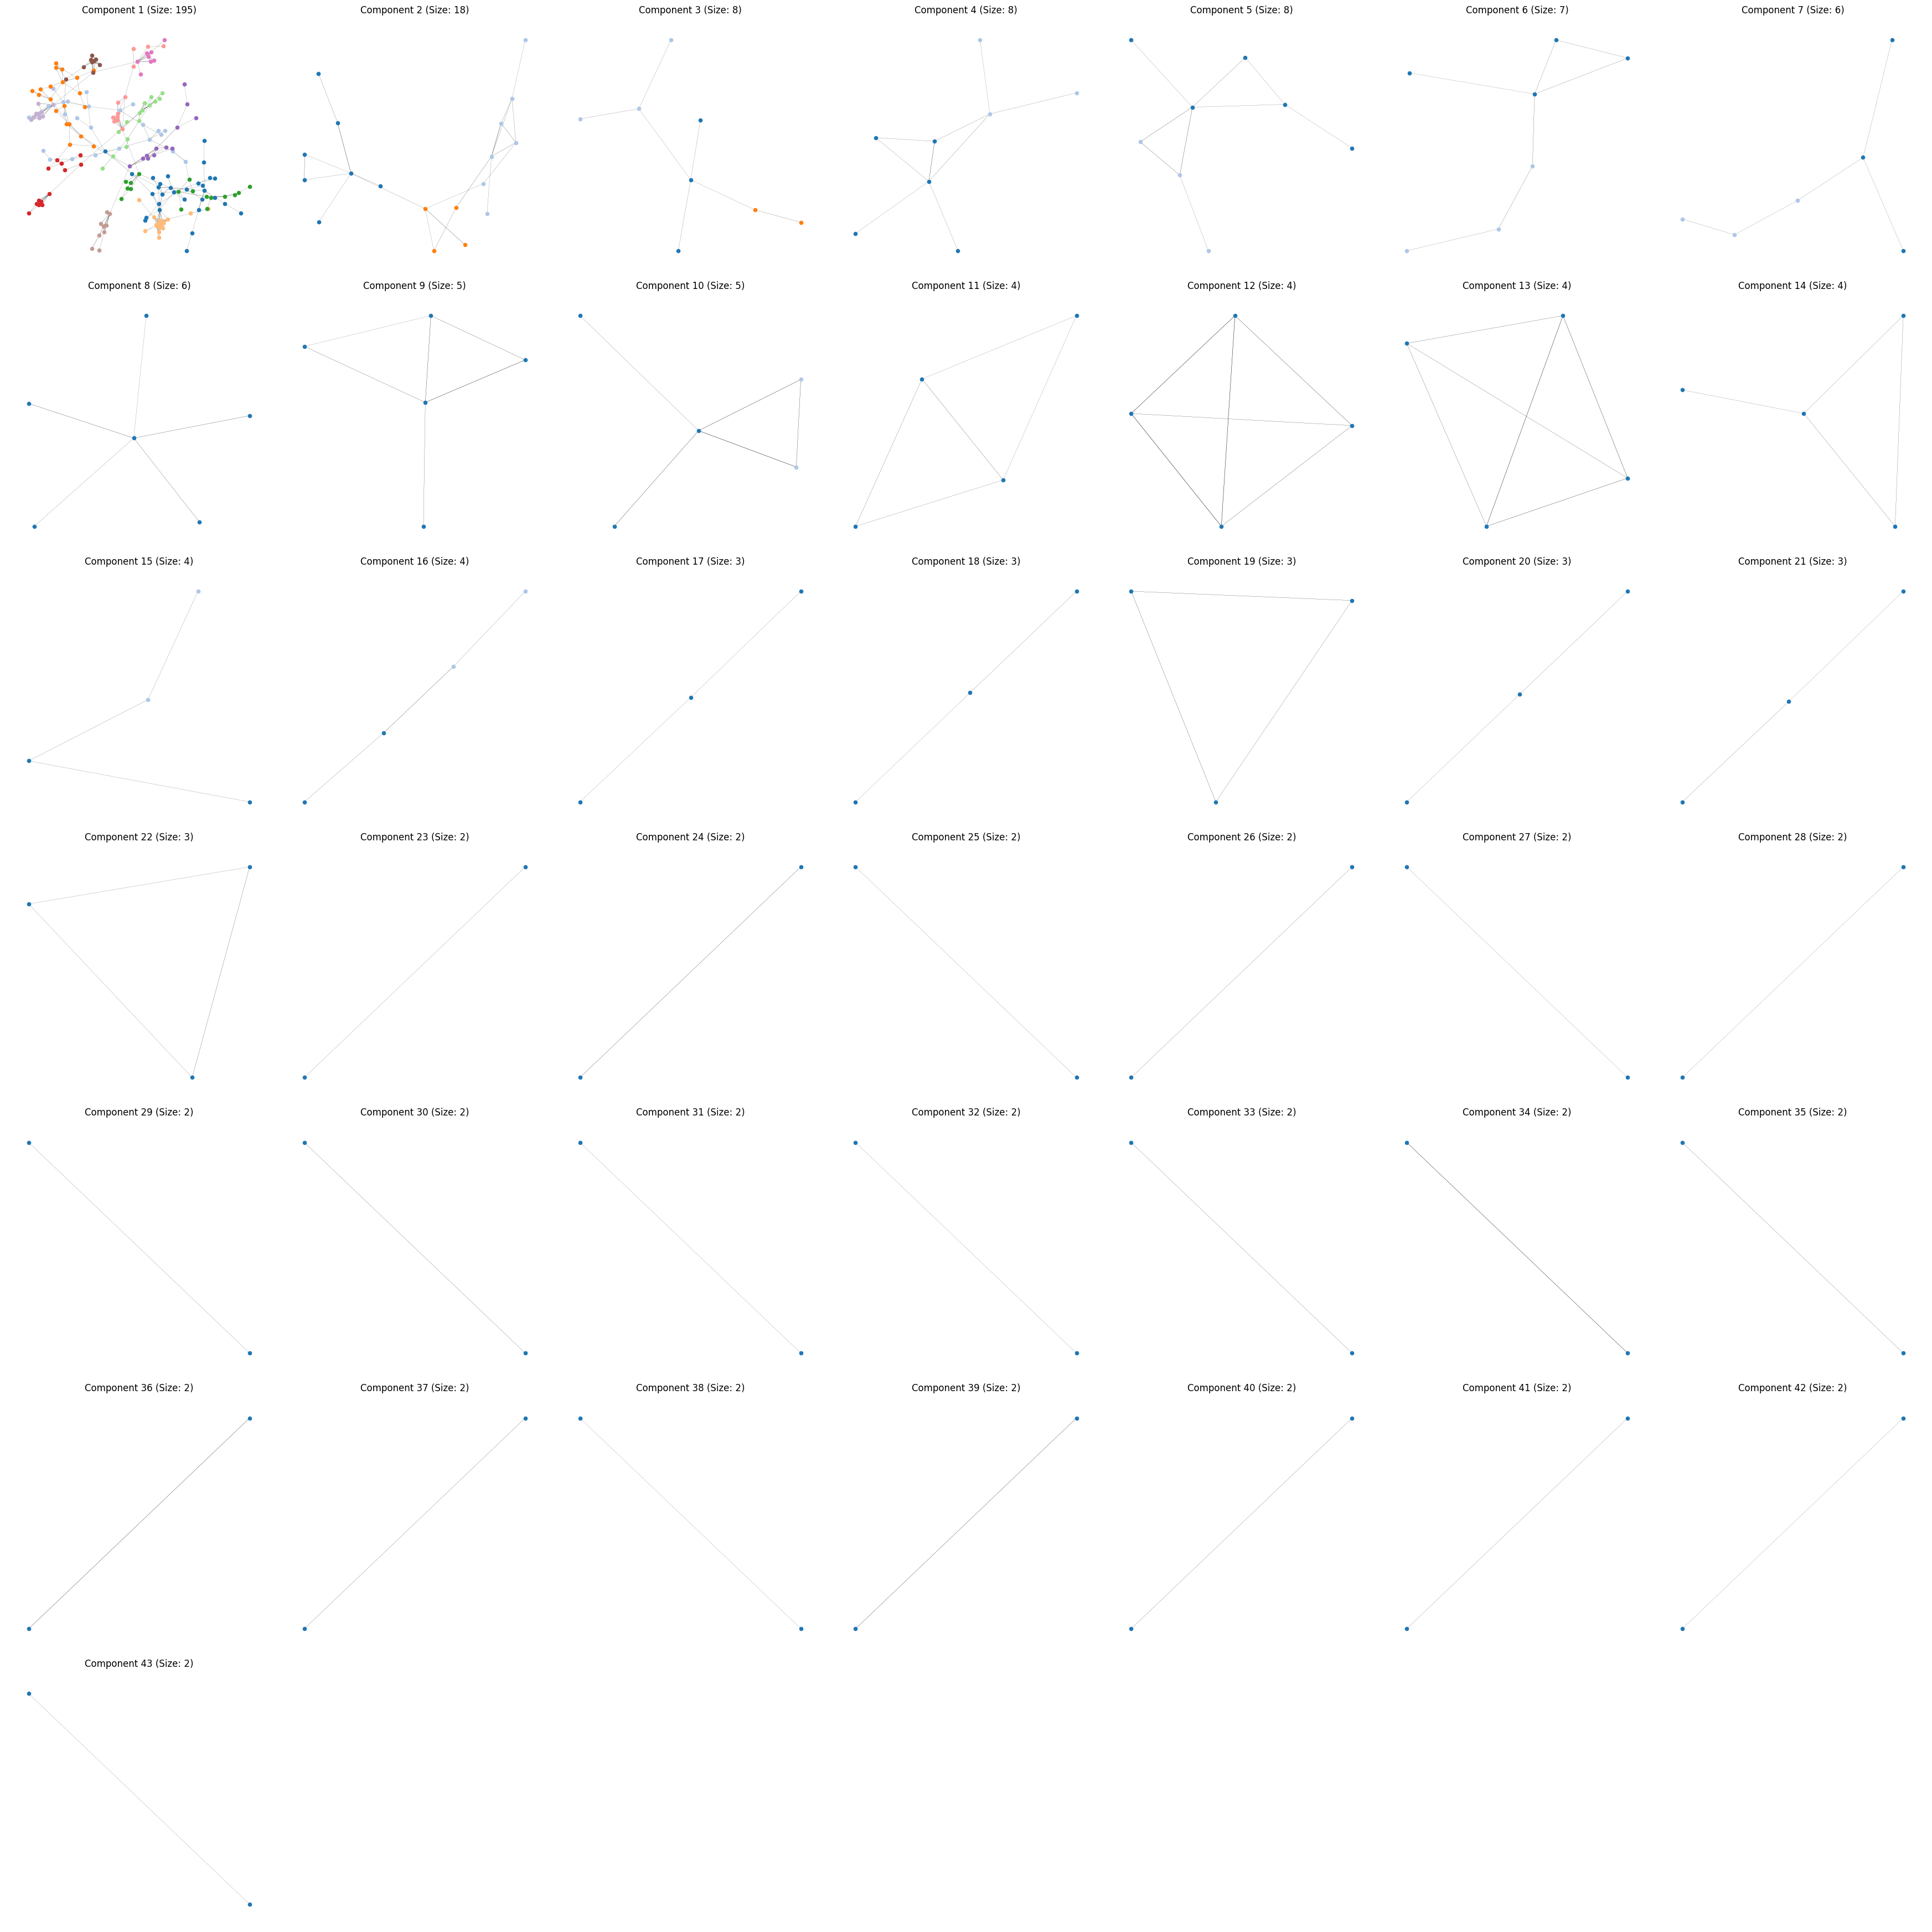

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np


def visualize_all_subgraphs(H, filename):
    # Get all connected components with more than one node
    connected_components = [c for c in nx.connected_components(H) if len(c) > 1]

    # Sort components by size (largest first)
    connected_components.sort(key=len, reverse=True)

    # Determine grid size
    n_components = len(connected_components)
    grid_size = int(np.ceil(np.sqrt(n_components)))

    # Create figure
    fig = plt.figure(figsize=(5 * grid_size, 5 * grid_size))

    # Color list for communities
    color_list = plt.cm.tab20(np.linspace(0, 1, 20))

    for i, component in enumerate(connected_components):
        ax = fig.add_subplot(grid_size, grid_size, i + 1)
        subgraph = H.subgraph(component)

        # Use a community detection algorithm
        communities = list(nx.community.greedy_modularity_communities(subgraph))  # type: ignore

        # Create a position layout
        pos = nx.spring_layout(subgraph)

        # Draw nodes
        for idx, community in enumerate(communities):
            nx.draw_networkx_nodes(
                subgraph,
                pos,
                ax=ax,
                nodelist=list(community),
                node_color=[color_list[idx % 20]],
                node_size=20,
            )

        # Draw edges with varying thickness based on weight
        edge_weights = [subgraph[u][v]["weight"] for u, v in subgraph.edges()]
        nx.draw_networkx_edges(subgraph, pos, ax=ax, alpha=0.9, width=edge_weights)  # type: ignore

        ax.set_title(f"Component {i+1} (Size: {len(component)})")
        ax.axis("off")

    plt.tight_layout()
    plt.savefig(os.path.join(out_path, filename), dpi=300, bbox_inches="tight")


# Use the function
visualize_all_subgraphs(H, "all_thresholded_components.png")
print("Visualization of all components saved as 'all_thresholded_components.png'")

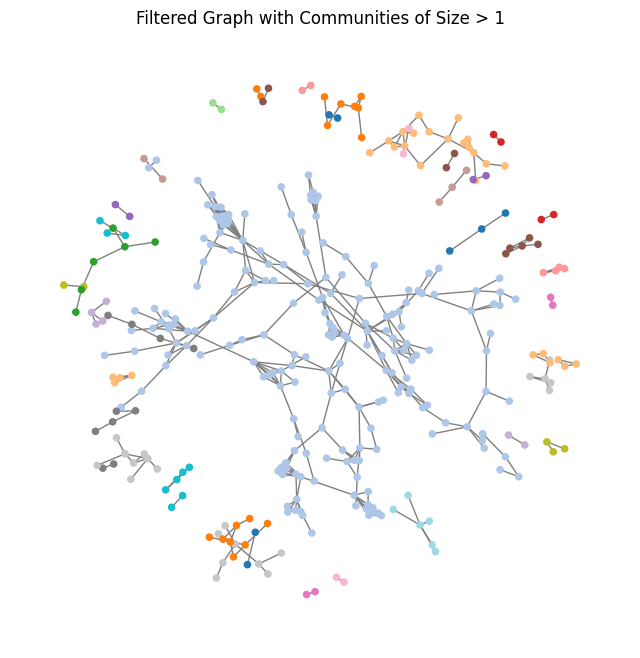

In [ ]:
# Filter out all communities of size 1 and color each subgraph uniquely
filtered_H = nx.Graph()
color_map = []
for component in nx.connected_components(H):
    if len(component) > 1:
        filtered_H.add_nodes_from(component)
        for u, v in nx.subgraph(H, component).edges():
            filtered_H.add_edge(u, v, weight=H[u][v]["weight"])
        color_map.extend([len(color_map) % 20] * len(component))

# Plot the filtered graph with unique colors for each subgraph
plt.figure(figsize=(width, height))
pos = nx.spring_layout(filtered_H)
nx.draw_networkx(
    filtered_H,
    pos,
    with_labels=False,
    node_size=20,
    node_color=[plt.cm.tab20(c / 20) for c in color_map],
    edge_color="gray",
)
plt.title("Filtered Graph with Communities of Size > 1")
plt.axis("off")
plt.savefig(os.path.join(out_path, "filtered_graph.png"), dpi=300)
plt.show()

In [ ]:
# import networkx as nx
# import matplotlib.pyplot as plt
# import numpy as np

# # Filter out all communities of size 1 and color each subgraph uniquely
# filtered_H = nx.Graph()
# color_map = []
# components = list(nx.connected_components(H))
# for i, component in enumerate(components):
#     if len(component) > 1:
#         filtered_H.add_nodes_from(component)
#         for u, v in nx.subgraph(H, component).edges():
#             filtered_H.add_edge(u, v, weight=H[u][v]['weight'])
#         color_map.extend([i % 20] * len(component))

# # Custom spring layout function
# def custom_spring_layout(G, k=None, pos=None, fixed=None, iterations=50, threshold=1e-4, weight='weight', scale=1):
#     if pos is None:
#         pos = {node: np.random.rand(2) for node in G.nodes()}

#     A = nx.to_numpy_array(G, weight=weight)
#     nodes = list(G.nodes())
#     nnodes = len(nodes)

#     # Component information
#     node_to_component = {}
#     for i, component in enumerate(components):
#         for node in component:
#             if node in G:
#                 node_to_component[node] = i

#     if k is None:
#         k = 1.0 / np.sqrt(nnodes)

#     # Iterations
#     for _ in range(iterations):
#         displacement = {node: np.zeros(2) for node in nodes}
#         for i, node_i in enumerate(nodes):
#             component_i = node_to_component[node_i]
#             for j, node_j in enumerate(nodes):
#                 if i != j:
#                     diff = pos[node_i] - pos[node_j]
#                     distance = max(np.linalg.norm(diff), 0.01)
#                     if node_to_component[node_j] == component_i:
#                         # Same component: regular spring force
#                         displacement[node_i] += (diff / distance) * (k * k / distance - A[i, j])
#                     else:
#                         # Different component: stronger repulsive force
#                         displacement[node_i] += (diff / distance) * (5 * k * k / distance)

#         # Update positions
#         for node in nodes:
#             pos[node] += displacement[node] * scale

#         # Set the center of gravity to (0, 0)
#         center = np.mean([pos[node] for node in nodes], axis=0)
#         for node in nodes:
#             pos[node] -= center

#         # Check for convergence
#         if np.mean([np.linalg.norm(displacement[node]) for node in nodes]) < threshold:
#             break

#     return pos

# # Use the custom spring layout
# pos = custom_spring_layout(filtered_H, k=0.5, iterations=100)

# # Plot the filtered graph with unique colors for each subgraph
# nx.draw_networkx(filtered_H, pos, with_labels=False, node_size=20, node_color=[plt.cm.tab20(c/20) for c in color_map], edge_color='gray')
# plt.title('Filtered Graph with Increased Spacing Between Communities')
# plt.axis('off')
# plt.show()